#### Importing all required libraries

In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn import preprocessing, svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split

 #### This method will load radiography data from "COVID-19 Radiography Database" folder
 #### return: (train_images, train_labels), (test_images, test_labels)

In [2]:
def load_radiography_data():
    
    # Load all Covid Images
    images = []
    labels = []
    for filename in os.listdir(os.path.join("C:/Users/Kratica Rastogi/PycharmProjects/FinalProject/COVID-19 Radiography Database", "COVID-19")):
        img = cv2.imread(os.path.join("C:/Users/Kratica Rastogi/PycharmProjects/FinalProject/COVID-19 Radiography Database", "COVID-19", filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
            labels.append("covid")

    count_covid_images = len(images)

    # Load all Normal (non-covid) Images
    for filename in os.listdir(os.path.join("C:/Users/Kratica Rastogi/PycharmProjects/FinalProject/COVID-19 Radiography Database", "NORMAL")):
        img = cv2.imread(os.path.join("C:/Users/Kratica Rastogi/PycharmProjects/FinalProject/COVID-19 Radiography Database", "NORMAL", filename), cv2.IMREAD_GRAYSCALE)
        if img is not None and count_covid_images > 0:
            images.append(img)
            labels.append("normal")
            count_covid_images = count_covid_images - 1

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, shuffle=True)
    return (np.array(X_train), np.array(y_train)), (np.array(X_test), np.array(y_test))

#### This method will normalize the data by dividing by 255. The normalized values will lie between 0 and 1
#### return: reshaped_train_images, reshaped_test_images, train_labels, test_labels

In [3]:
def preprocess_data():
    reshaped_train_images = train_images.reshape(len(train_images), 1024 * 1024)
    reshaped_test_images = test_images.reshape(len(test_images), 1024 * 1024)
    le = preprocessing.LabelEncoder()
    
    # Normalize pixel values to be between 0 and 1
    return reshaped_train_images / 255.0, reshaped_test_images / 255.0, le.fit_transform(
        train_labels), le.fit_transform(test_labels)

####  This method will create and fit SVM model and return the same
#### return: svm_classifier

In [4]:
def create_and_train_model():
    svm_classifier = svm.SVC()
    return svm_classifier.fit(train_images, train_labels)

#### This method will predict the model
#### return: predictions

In [5]:
def predict_model():
    return model.predict(test_images)

#### This method will evaluate and print the score metrics
#### return: nothing

In [6]:
def evaluate_metrics():
    acc = accuracy_score(test_labels, predictions)
    prec_score = precision_score(test_labels, predictions, average='weighted', zero_division=0)
    recall = recall_score(test_labels, predictions, average='weighted', zero_division=0)
    fscore = f1_score(test_labels, predictions, average='weighted', zero_division=0)
    confusion_matrix_knn = confusion_matrix(test_labels, predictions)
    print("accuracy score:", acc)
    print("precision score:", prec_score)
    print("recall score:", recall)
    print("f score:", fscore)
    print("Confusion Matrix:", confusion_matrix_knn)

####  This method will plt the observations captured by fitting the model
#### return: nothing

In [7]:
def plot_observations():
    
    # # Generate confusion matrix
    titles_options = [("Confusion matrix, with normalization", None)]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, test_images, test_labels, cmap=plt.cm.Blues, normalize='true')
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

####  Main Method : Execution starts here

accuracy score: 0.9727272727272728
precision score: 0.9741626794258373
recall score: 0.9727272727272728
f score: 0.9727205103351892
Confusion Matrix: [[54  0]
 [ 3 53]]
Confusion matrix, with normalization
[[1.         0.        ]
 [0.05357143 0.94642857]]


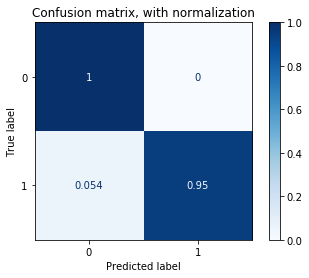

In [8]:
if __name__ == '__main__':

    # load data
    (train_images, train_labels), (test_images, test_labels) = load_radiography_data()

    # pre-process data
    train_images, test_images, train_labels, test_labels = preprocess_data()

    # create and fit SVM
    model = create_and_train_model()

    # predict model
    predictions = predict_model()

    # print evaluations
    evaluate_metrics()

    # plot observation from model
    plot_observations()